<a href="https://colab.research.google.com/github/p0lsol/compling/blob/main/workbook_distributional_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(ДЗ Полина Соловьева)
```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Welcome to Google Colab

**Jupyter-ноутбук — интерактивная среда разработки**

Свойства Jupyter

* работа в ячейках
  * мгновенное отображение результата работы фрагментов кода
  * можно разбить выполнение кода на части
  * ячейки можно запускать в произвольном порядке

* код и текст
  * Jupyter поддерживает 2 типа ячеек - текстовые и кодовые
  * всю вашу работу можно документировать в текстовых ячейках

* визуализация
  * табличных данных
  * графиков
  * \+ красивый вывод данных

* область применения
  * машинное обучение
  * дата саенс
  * большие данные
  * научные вычисления
  * документация

**Интерфейс Google Colab — разновидность Jupyter-ноутбука**

Основные отличия

* интеграция с внешними сервисами
  * GitHub (можно напрямую скачивать и загружать ноутбуки)
  * Google Drive (там можно хранить данные, модели; нужно подключить свой диск к ноутбуку)
  * NEW! генеративный ИИ может помочь вам с написанием кода

* аппаратный ускоритель
  * GPU / TPU используется для машинного обучения и других ресурсоёмких вычислений
  * бесплатный доступ / недорогая подписка
  * см. меню `Runtime` - `Change runtime type`

**Основы работы с интерфейсом Google Colab**

***Открыть файл***

Горячие клавиши: `Ctrl + O` или `Cmd + O`

Опции:

* загружаем файл *.ipynb с локального диска
* открываем файл *.ipynb с Google-диска
* открываем файл *.ipynb с GitHub (URL, поиск пользователя)
* открываем из GitHub с помощью кнопки `Open in Colab`

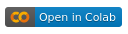

***Сохранить файл***

Горячие клавиши: сохранить на Google-диске `Ctrl + S` или `Cmd + S`

Возможности:

* сохранить копию в репозитории на GitHub (`File` - `Save a copy in GitHub`)
* сохранить GitHub Gist
* скачать *.ipynb (Jupyter-ноутбук)
* скачать *.py (скрипт на Python без деления на ячейки и текстовой информации)

***Внести изменения в файл***

Можно создать кодовую или текстовую ячейку.

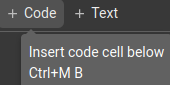

В кодовой ячейке можно ввести код на языке Python или команды shell.

Горячие клавиши:
- новая ячейка `Ctrl + M + B` или `Cmd + M + B`
- запустить ячейку `Shift + Enter`


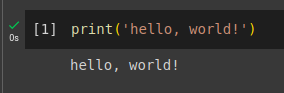

Ячейка содержит следующую информацию
- вывод данных
- время исполнения кода
- порядковый номер ячейки по ходу исполнения

In [ ]:
print('hello, world!')

hello, world!


Текстовые ячейки оформляются как Markdown.

См. [руководство по работе с Markdown](https://github.com/vifirsanova/compling/blob/main/markdown.md/).

Руководство можно использовать для оформления файла README.md в вашем репозитории на GitHub.

## Дистрибутивная семантика

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [146]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 15:06:12--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.6’

input.txt.6         100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2024-01-28 15:06:13 (18.7 MB/s) - ‘input.txt.6’ saved [1115394/1115394]



In [147]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [148]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [149]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# токенизация по словам
tokens = word_tokenize(cleaned_text)

# выведем на экран несколько токенов
tokens[:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak',
 'all',
 'speak',
 'speak',
 'first',
 'citizen',
 'you',
 'are',
 'all',
 'resolved',
 'rather']

Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - если слово встречается реже, оно не попадает в нашу модель

`workers` - потоки (распараллеливание для ускорение работы)

In [150]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)

In [151]:
# выведем результат обучения модели
model.wv['king']

array([ 3.0993388e-04,  2.4344164e-03, -1.4234134e-03,  3.3902135e-04,
       -5.0136447e-04, -1.6091732e-02,  3.2627941e-03,  2.2791972e-02,
       -1.1042583e-02, -1.7762078e-02, -3.6597378e-03, -1.5405690e-03,
       -9.7852349e-03,  1.2478584e-02,  2.5990354e-03, -7.2583784e-03,
       -4.4826027e-03, -1.3544309e-02,  2.0077960e-03,  3.9538628e-04,
       -1.4317234e-03, -5.3780270e-04,  4.8290375e-03, -1.4868095e-04,
        5.2706026e-03, -3.7946037e-03, -1.5596629e-04, -1.3292088e-02,
       -6.4670295e-03,  1.0294678e-02,  7.8338804e-03, -1.2208835e-02,
        2.7726702e-03, -1.1601759e-02, -5.0268029e-03,  1.0403274e-02,
       -9.2993993e-03,  3.2981781e-03,  7.1992739e-03, -1.4952275e-02,
       -8.3959708e-03, -8.6815543e-03, -1.3961735e-03,  1.2780608e-03,
        9.4627552e-03, -3.8420085e-03, -6.9499738e-03,  1.9297763e-03,
       -2.6639791e-03,  2.8018560e-04,  1.7777625e-03, -5.7056342e-05,
       -4.2708353e-03, -5.7700970e-03,  1.5772636e-03, -8.5923343e-04,
      

### **Задача 2.** Считаем сходство

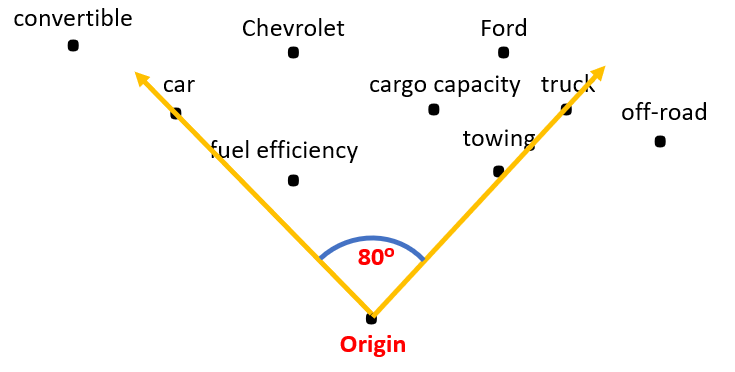

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [152]:
model.wv.most_similar(["king"])

[('seen', 0.6131981015205383),
 ('youth', 0.6103989481925964),
 ('since', 0.6095167994499207),
 ('oer', 0.6086562871932983),
 ('merit', 0.6057994961738586),
 ('call', 0.6040176153182983),
 ('fathers', 0.599946141242981),
 ('best', 0.5997427701950073),
 ('custom', 0.5994468331336975),
 ('devise', 0.5908424258232117)]

In [153]:
model.wv.similarity('king', 'queen')

-0.029355673

In [154]:
model.wv.similarity('king', 'prince')

0.027135193

In [155]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

### **Задача 3.** Визуализация

Важный этап подготовки данных к визуализации - сокращение размерности вектора.

Мы обучили вектора размером 100. Теперь нужно превратить их в 2D.

Для этого используют разные алгоритмы, мы воспользуемся PCA (principal component analysis), статистической моделью, которая приводит всю информацию о полученном контенте к виду матрицы меньшей размерности, например, к виду таблицы (двухмерный массив), удобной для построения графиков и эксплораторного анализа данных.

Чтобы понять, как работает PCA, можно почитать [этот блог](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [156]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

Создаем функцию для отрисовки графика с помощью PCA.

In [157]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

Для визуализации давайте посмотрим, какие эпитеты Шекспир использует для описания королей и королев!

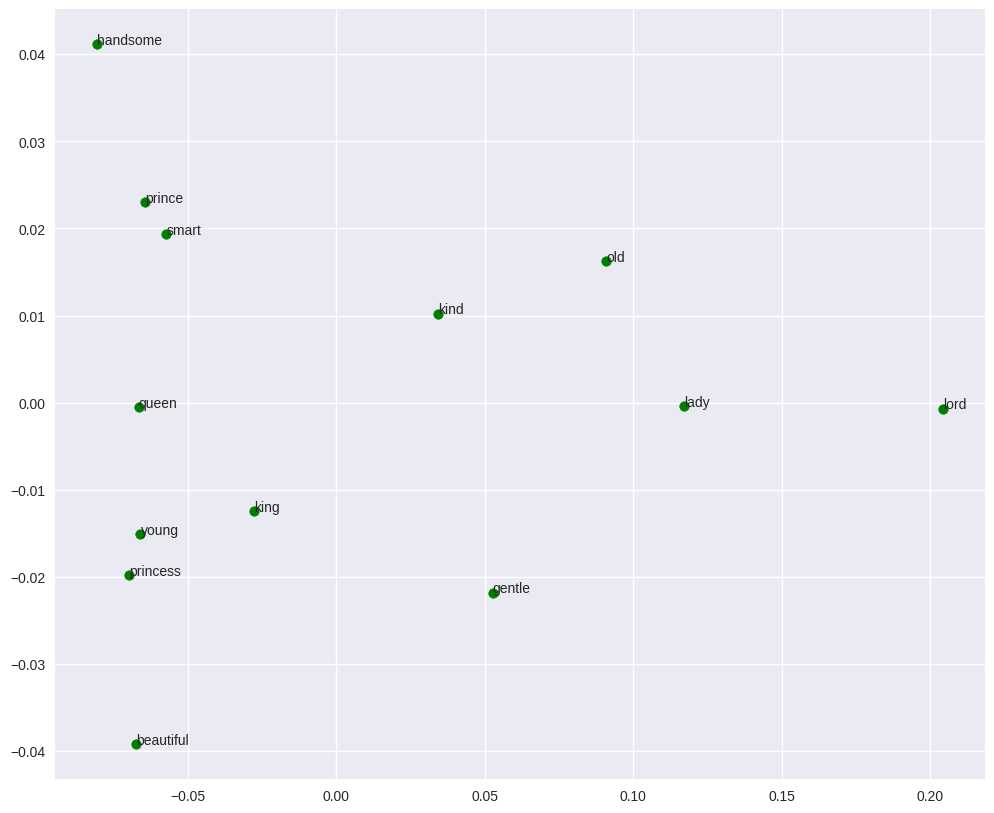

In [158]:
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

## Домашнее задание

**Базовый уровень:**

* удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно)
* заново обучить вектора
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений)
* представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?

**Уверенный уровень:**

* обучить такую же модель Word2Vec на другом, более крупном корпусе
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках
* представить выводы о проделанной работы: удалось ли вам обнаружить какие-либо связи и отношения?

**Продвинутый уровень:**

* обучить FastText с помощью [туториала](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html)
* найти сходства и различия между отдельными векторами
* объяснить принцип работы FastText своими словами

**Опционально для любого уровня:**

* поиграть с визуализацией: поменять стиль, цвета графики
* выбрать другой набор слов для визуализации



In [134]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-28 14:35:15--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.5’

input.txt.5         100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2024-01-28 14:35:16 (18.4 MB/s) - ‘input.txt.5’ saved [1115394/1115394]



In [135]:
file_path = 'input.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

In [164]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
#удаляем стоп-слова
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(cleaned_text)

stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

In [138]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[filtered_tokens], vector_size=100, window=5, min_count=1, workers=4)

In [139]:
model.wv['king']

array([ 9.3145944e-05,  3.1112744e-03, -6.7663677e-03, -1.3235710e-03,
        7.7920300e-03,  7.1407780e-03, -3.5348057e-03,  2.7354809e-03,
       -8.4440298e-03,  6.1859712e-03, -4.6623680e-03, -3.3372582e-03,
        9.1934754e-03,  8.8475487e-04,  7.5921416e-03, -6.2295008e-03,
        5.1741037e-03,  9.7883046e-03, -8.5034324e-03, -5.2907323e-03,
       -6.9990945e-03, -4.7875969e-03, -3.6863915e-03, -8.5909516e-03,
        7.8024808e-03, -4.8888149e-03,  8.3964830e-03,  5.1851803e-03,
       -6.6043390e-03,  3.8205017e-03,  5.6213746e-03, -7.4163340e-03,
       -7.3872157e-03, -2.5352181e-03, -8.5831629e-03, -1.4452643e-03,
       -2.8707134e-04,  3.3098783e-03,  1.3657493e-03, -9.9832762e-04,
       -5.5922349e-03,  1.5047805e-03, -1.0559289e-03,  6.8209413e-03,
        4.0603448e-03,  4.5962986e-03,  1.3078121e-03, -2.6980136e-03,
       -4.2355629e-03, -9.2618784e-04,  1.4751214e-03, -2.7258794e-03,
       -7.0957462e-03, -7.9152538e-03, -9.2687905e-03, -5.7968101e-03,
      

In [140]:
model.wv.most_similar(["king"])

[('following', 0.37871962785720825),
 ('halfmoon', 0.36562228202819824),
 ('hencebanished', 0.35695189237594604),
 ('tops', 0.3323342800140381),
 ('therewith', 0.32556644082069397),
 ('dissension', 0.32018423080444336),
 ('debt', 0.31755542755126953),
 ('quarter', 0.31566405296325684),
 ('savageness', 0.3156253397464752),
 ('banks', 0.3146883547306061)]

In [141]:
model.wv.similarity('king', 'queen')

-0.036845148

In [142]:
model.wv.similarity('king', 'prince')

0.10492411

In [143]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

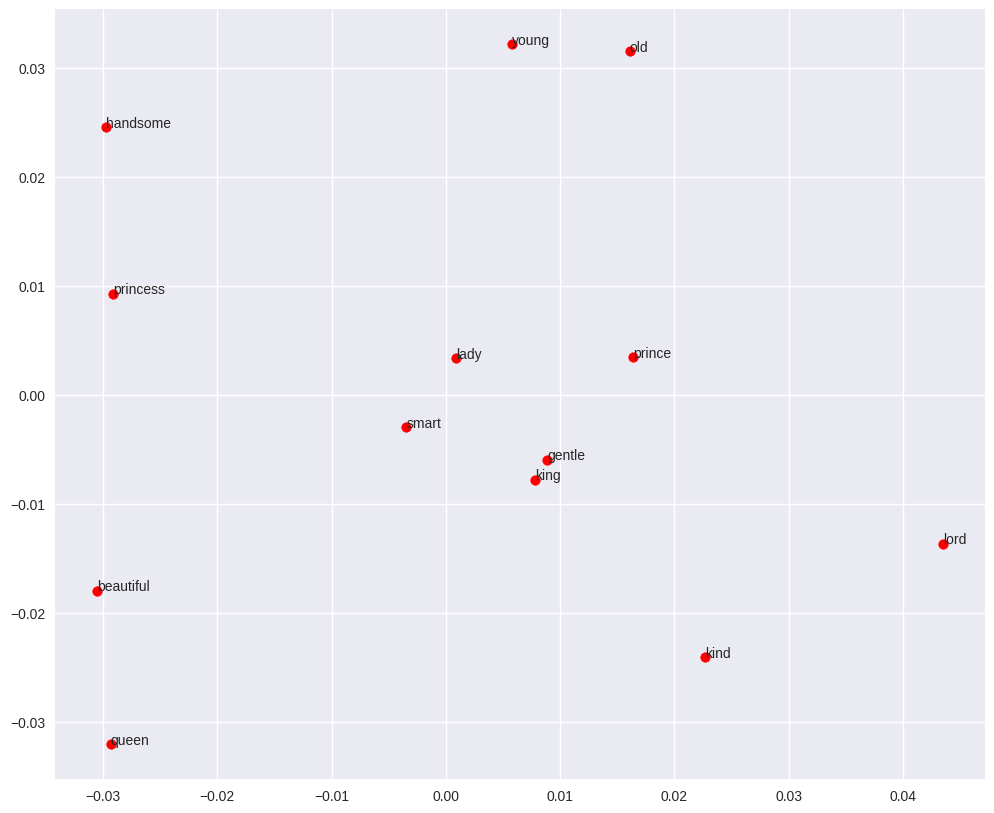

In [145]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

Каким-то образом удаление стоп-слов повлияло на схожесть векторов king и prince (они теперь немного более схожи). Интересно, что после удаления стоп-слов вектора old и young стали близкими на графике, а gentle и king, young и princess разошлись. Возможно модель больше не считает их настолько похожими, потому что их теперь не связывает the? (the young princess и т.д.) 🤔

**Word2Vec на Войне и Мире** 🔽

In [172]:
!wget https://raw.githubusercontent.com/jart/poemy2/master/corpora/literature/leo%20tolstoy%20-%20war%20and%20peace.txt

--2024-01-28 15:13:22--  https://raw.githubusercontent.com/jart/poemy2/master/corpora/literature/leo%20tolstoy%20-%20war%20and%20peace.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3230047 (3.1M) [text/plain]
Saving to: ‘leo tolstoy - war and peace.txt.1’

leo tolstoy - war a 100%[===================>]   3.08M  --.-KB/s    in 0.06s   

2024-01-28 15:13:22 (47.6 MB/s) - ‘leo tolstoy - war and peace.txt.1’ saved [3230047/3230047]



In [173]:
file_path = 'leo tolstoy - war and peace.txt'
with open(file_path, 'r') as file:
    text_content = file.read()

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

In [174]:
with open(file_path, 'r') as file:
    text_content = file.read()

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

In [175]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

tokens = word_tokenize(cleaned_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [180]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)

In [178]:
model.wv['napoleon']

array([ 0.00485603, -0.00494178,  0.01584375,  0.00475331,  0.00471948,
       -0.04021205,  0.00599653,  0.0353522 , -0.01912364, -0.0307195 ,
       -0.02151969, -0.02405564, -0.0168575 ,  0.01287584, -0.00800509,
       -0.02811371,  0.00811215, -0.01180608, -0.01780761, -0.05717731,
        0.03159296,  0.02120844,  0.01271067, -0.03687341, -0.01142852,
        0.00974049, -0.01213016, -0.01607988, -0.02867923,  0.01562181,
        0.03181662, -0.00136987,  0.00668604, -0.02594722, -0.01250306,
        0.02487514,  0.00165509, -0.00096016, -0.02405959, -0.01898898,
        0.00546555, -0.00826142,  0.00563709,  0.0074504 ,  0.02262828,
       -0.02652747, -0.00188973, -0.01609709,  0.02993056,  0.00365498,
        0.03349945, -0.01381737,  0.01409498,  0.00173962, -0.03517757,
       -0.02314314,  0.01763475,  0.00671161, -0.02457646, -0.01168935,
       -0.00824042,  0.01784276,  0.01097144,  0.00897843, -0.01840991,
        0.03844589,  0.00566554,  0.02260502, -0.0449488 ,  0.01

In [182]:
model.wv.most_similar(['napoleon'])

[('into', 0.9634124636650085),
 ('on', 0.9629109501838684),
 ('my', 0.9627535343170166),
 ('andrew', 0.9627023935317993),
 ('expression', 0.9622317552566528),
 ('know', 0.9621281623840332),
 ('suddenly', 0.9620310068130493),
 ('me', 0.9618445038795471),
 ('was', 0.9617771506309509),
 ('hippolyte', 0.9617197513580322)]

In [184]:
model.wv.similarity('napoleon', 'andrew')

0.9627024

In [185]:
model.wv.similarity('napoleon', 'pierre')

0.9612825

In [186]:
model.wv.doesnt_match(['napoleon', 'andrew', 'pierre'])

'napoleon'

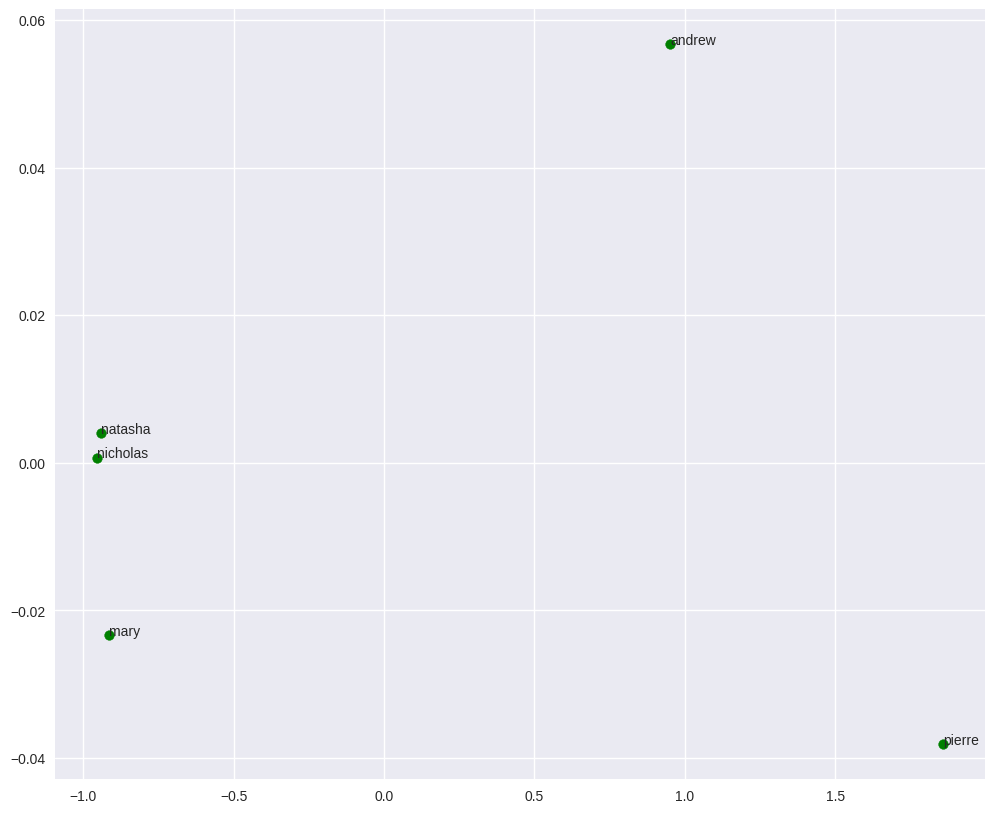

In [187]:
pca_scatterplot(model, ['andrew', 'natasha', 'pierre', 'nicholas', 'mary'])

Если честно, вообще не помню Войну и Мир, но могу предположить, что Наташа и Николай настолько близки, потому что часто представлены в тексте в связке с их фамилией, поэтому модель считает их вектора настолько похожими.

**FastText** 🔽



In [192]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data
corpus_file = 'leo tolstoy - war and peace.txt'

model = FastText(vector_size=100)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

print(model)


In [193]:
import tempfile
import os
with tempfile.NamedTemporaryFile(prefix='saved_model_gensim-', delete=False) as tmp:
    model.save(tmp.name, separately=[])

loaded_model = FastText.load(tmp.name)
print(loaded_model)

os.unlink(tmp.name)

In [196]:
wv = model.wv
print(wv['andrew'])

array([ 6.46232724e-01, -6.24397576e-01, -4.64141726e-01,  3.47287863e-01,
       -6.10154986e-01,  4.88981247e-01,  3.59393448e-01, -4.37919259e-01,
       -2.12814420e-01, -6.25947773e-01,  6.42751932e-01,  3.10173750e-01,
       -1.46094143e+00,  2.14297748e+00, -8.05401862e-01, -8.54882956e-01,
       -5.67149282e-01,  2.67322734e-02, -6.29005015e-01, -5.35681009e-01,
       -1.27663338e+00,  7.43282974e-01, -7.98340380e-01, -1.84282921e-02,
        5.64069927e-01, -1.40385523e-01, -6.48052812e-01,  8.95195007e-01,
        1.30504385e-01,  4.36531633e-01,  1.24401122e-01,  9.64144245e-03,
        6.68645978e-01, -2.43811059e+00,  6.60544097e-01,  1.03150821e+00,
        1.10711050e+00,  1.08249068e+00, -7.53434062e-01, -5.32342017e-01,
        2.55775511e-01,  6.15405202e-01,  5.59306860e-01, -9.33521926e-01,
       -1.23807125e-01,  3.62472057e-01, -3.46787840e-01,  2.54087180e-01,
        1.68203676e+00,  1.22724824e-01, -2.16135606e-01, -3.53334785e-01,
        2.39631340e-01,  

In [198]:
print(wv.most_similar('andrew'))

[('drew', 0.9421851634979248),
 ('Andrew', 0.938914954662323),
 ("Andrew's", 0.9280752539634705),
 ('Bagration,', 0.9090668559074402),
 ('Andrew;', 0.905896008014679),
 ('withdrew', 0.8986581563949585),
 ('Bagration.', 0.8985702395439148),
 ('Andrew,', 0.8948278427124023),
 ("Vasili's", 0.8856313228607178),
 ('Andreevich', 0.883787214756012)]


In [199]:
print(wv.similarity("andrew", "natasha"))

0.33517292


In [201]:
print(wv.similarity("natasha", "nicholas"))

0.850387


In [206]:
print(wv.doesnt_match("andrew nicholas pierre".split()))

'andrew'


когда как Word2Vec работает со словами, **FastText** разбивает каждое слово на подслова (н-граммы знаков/букв в этом слове), и вектор отдельного слова считается путем складывания векторов всех подслов слова. Все это для того, чтобы можно было считать все формы одного слова в морфологически богатых языках.

Английский не особенно богатый, поэтому на английском корпусе ВиМ можно хорошо увидеть, как работает FastText: он посчитал drew самым схожим словом с andrew из-за н-граммы знаков.